###
# pySuStaIn: a Python implementation of the Subtype and Stage Inference (SuStaIn) algorithm
#
# If you use pySuStaIn, please cite the following core papers:
# 1. The original SuStaIn paper:    https://doi.org/10.1038/s41467-018-05892-0
# 2. The pySuStaIn software paper:  https://doi.org/10.1016/j.softx.2021.100811

# Please also cite the corresponding progression pattern model you use:
# 1. The piece-wise linear z-score model (i.e. ZscoreSustain):  https://do i.org/10.1038/s41467-018-05892-0
# 2. The event-based model (i.e. MixtureSustain):               https://doi.org/10.1016/j.neuroimage.2012.01.062
#    with Gaussian mixture modeling (i.e. 'mixture_gmm'):       https://doi.org/10.1093/brain/awu176
#    or kernel density estimation (i.e. 'mixture_kde'):         https://doi.org/10.1002/alz.12083
# 3. The model for discrete ordinal data (i.e. OrdinalSustain): https://doi.org/10.3389/frai.2021.613261
#
# Thanks a lot for supporting this project.
#
# Authors:      Peter Wijeratne (p.wijeratne@ucl.ac.uk) and Leon Aksman (leon.aksman@loni.usc.edu)
# Contributors: Arman Eshaghi (a.eshaghi@ucl.ac.uk), Alex Young (alexandra.young@kcl.ac.uk), Cameron Shand (c.shand@ucl.ac.uk)
###

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')

C:\Users\nss_1\AppData\Local\Temp\ipykernel_22748\3495069841.py:1: DtypeWarning: Columns (4,11,12,58,112,193,202,204) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')


In [ ]:
df

,PATNO,EVENT_ID,AGE_AT_VISIT,COGCAT,COGCAT_TEXT,COGCHG,COGDECLN,COGDXCL,COGSTATE,COHORT,...,STAIAD37,STAIAD38,STAIAD39,STAIAD4,STAIAD40,STAIAD5,STAIAD6,STAIAD7,STAIAD8,STAIAD9
0,3000,V01,69.4,NaN,NaN,NaN,NaN,NaN,NaN,Healthy Control,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3000,V02,69.6,NaN,NaN,NaN,NaN,NaN,NaN,Healthy Control,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3000,V03,69.9,NaN,NaN,NaN,NaN,NaN,NaN,Healthy Control,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3000,V04,70.2,NaN,NaN,NaN,NaN,NaN,NaN,Healthy Control,...,2.0,2.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0
4,3000,V05,70.6,NaN,NaN,NaN,NaN,NaN,NaN,Healthy Control,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,324862,V02,57.4,NaN,NaN,0.0,NaN,NaN,NaN,PD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12496,325051,V02,65.0,NaN,NaN,0.0,NaN,NaN,NaN,PD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12497,325566,V02,51.8,NaN,NaN,0.0,NaN,NaN,NaN,PD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12498,329289,V02,62.6,NaN,NaN,1.0,NaN,NaN,NaN,PD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Group by 'Visit' and calculate percentage of missing values per column
missing_percent_by_visit = (
    df.groupby('EVENT_ID')
      .apply(lambda g: g.isnull().mean() * 100)
      .round(2)
)

C:\Users\nss_1\AppData\Local\Temp\ipykernel_3312\2659245080.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.isnull().mean() * 100)


In [ ]:
missing_percent_by_visit

,PATNO,EVENT_ID,AGE_AT_VISIT,COGCAT,COGCAT_TEXT,COGCHG,COGDECLN,COGDXCL,COGSTATE,COHORT,...,STAIAD37,STAIAD38,STAIAD39,STAIAD4,STAIAD40,STAIAD5,STAIAD6,STAIAD7,STAIAD8,STAIAD9
EVENT_ID,,,,,,,,,,,,,,,,,,,,,
V01,0.0,0.0,0.00,99.86,99.86,100.00,99.86,99.86,99.86,0.00,...,98.72,98.72,98.72,98.72,98.72,98.72,98.72,98.72,98.72,98.72
V02,0.0,0.0,0.00,100.00,100.00,62.27,62.17,62.22,62.22,0.00,...,48.25,48.25,48.30,48.25,48.25,48.35,48.25,48.25,48.30,48.25
V03,0.0,0.0,0.00,99.84,99.84,100.00,99.84,99.84,99.84,0.00,...,99.53,99.53,99.53,99.53,99.53,99.53,99.53,99.53,99.53,99.53
V04,0.0,0.0,0.04,61.33,61.33,51.76,12.87,12.87,12.87,0.04,...,4.51,4.51,4.58,4.51,4.55,4.47,4.55,4.51,4.55,4.58
V05,0.0,0.0,0.00,99.82,99.82,74.39,99.82,99.82,99.82,0.00,...,99.82,99.82,99.82,99.82,99.82,99.82,99.82,99.82,99.82,99.82
V06,0.0,0.0,0.00,37.36,37.36,68.94,6.52,6.52,6.52,0.00,...,5.38,5.32,5.32,5.21,5.38,5.26,100.00,5.21,5.21,5.21
V07,0.0,0.0,0.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
V08,0.0,0.0,0.00,31.15,31.15,75.08,5.99,5.99,5.99,0.00,...,5.91,5.91,5.91,5.91,5.91,5.84,5.84,5.84,5.84,5.84
V09,0.0,0.0,0.00,100.00,100.00,100.00,100.00,100.00,100.00,0.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [ ]:
missing_percent_by_visit.to_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/missing_precentage_per_visit.csv')

In [ ]:
required_visits = ["V04", "V06", "V08"]
cog_cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT"]
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + cog_cols + ["EVENT_ID"]


In [ ]:
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

In [ ]:
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]

In [ ]:
# import the python packages needed to generate simulated data for the tutorial
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys
import pySuStaIn

# this needs to point to wherever the sim folder inside pySuStaIn is on your computer
#sys.path.insert(0,'/Users/alexandrayoung/Documents/Code/pySuStaIn-test/pySuStaIn/sim/')
# if you're running the notebook from within the existing structure you can use
sys.path.insert(0,'../sim/')
from simfuncs import generate_random_Zscore_sustain_model, generate_data_Zscore_sustain

In [ ]:
df_control = df[df["COHORT"].isin(["Healthy Control"])]

In [ ]:
# Step 4: Drop any PATNO who has missing values in any of those columns
def is_patient_valid(group):
    return (len(group) == 3) and (not group[cog_cols].isnull().any().any())

df_control = df_control.groupby("PATNO").filter(is_patient_valid)


In [ ]:
df_control

,PATNO,AGE_AT_VISIT,FINAL_SEX_ENCODED,COHORT,MCATOT,NP1RTOT,NP2PTOT,NP3TOT,EVENT_ID
3,3000,70.2,0.0,Healthy Control,29.0,1.0,0.0,1.0,V04
5,3000,71.2,0.0,Healthy Control,28.0,3.0,0.0,4.0,V06
7,3000,72.3,0.0,Healthy Control,30.0,3.0,0.0,2.0,V08
36,3004,60.4,1.0,Healthy Control,26.0,0.0,0.0,3.0,V04
38,3004,61.5,1.0,Healthy Control,27.0,1.0,0.0,7.0,V06
...,...,...,...,...,...,...,...,...,...
12267,249498,68.9,NaN,Healthy Control,27.0,1.0,0.0,6.0,V04
12367,292982,79.2,NaN,Healthy Control,28.0,0.0,0.0,8.0,V04
12377,293057,70.9,NaN,Healthy Control,30.0,0.0,0.0,1.0,V04
12386,293209,67.7,NaN,Healthy Control,NaN,0.0,NaN,1.0,V04


In [ ]:
df_control_selected=  df_control[["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT"]]

In [ ]:
df_control_selected

,MCATOT,NP1RTOT,NP2PTOT,NP3TOT,AGE_AT_VISIT
3,29.0,1.0,0.0,1.0,70.2
5,28.0,3.0,0.0,4.0,71.2
7,30.0,3.0,0.0,2.0,72.3
36,26.0,0.0,0.0,3.0,60.4
38,27.0,1.0,0.0,7.0,61.5
...,...,...,...,...,...
12267,27.0,1.0,0.0,6.0,68.9
12367,28.0,0.0,0.0,8.0,79.2
12377,30.0,0.0,0.0,1.0,70.9
12386,NaN,0.0,NaN,1.0,67.7


In [ ]:
df_pd_prod_selected=df_prod_pd[["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT"]]

In [ ]:
# extract data for control subjects


# compute the mean and standard deviation of the control population
mean_control = np.mean(df_control_selected,axis=0)
std_control = np.std(df_control_selected,axis=0)

# z-score the data
data = (df_pd_prod_selected-mean_control)/std_control
data_control = (df_control_selected-mean_control)/std_control

# multiply data for decreasing biomarkers by -1
#is_decreasing = np.mean(data,axis=0)<np.mean(data_control,axis=0)
#data.loc[:, is_decreasing] = data.loc[:, is_decreasing] * -1

# For data_control
#data_control.loc[:, is_decreasing] = data_control.loc[:, is_decreasing] * -1

# Check that the mean of the control population is 0
#print('Mean of controls is ',np.mean(data_control,axis=0))
# Check that the standard deviation of the control population is 1
#print('Standard deviation of controls is ',np.std(data_control,axis=0))
# Check that the mean of the whole dataset is positive
#print('Mean of whole dataset is ',np.mean(data,axis=0))
# Check that the standard deviation of the whole dataset is greater than 1
#print('Standard deviation of whole dataset is ',np.std(data,axis=0))

In [ ]:
mean_control

MCATOT          27.392694
NP1RTOT          0.534247
NP2PTOT          0.493902
NP3TOT           1.670229
AGE_AT_VISIT    63.643946
dtype: float64

In [84]:
std_control

MCATOT           2.222989
NP1RTOT          1.031822
NP2PTOT          1.107056
NP3TOT           2.932516
AGE_AT_VISIT    11.422064
dtype: float64

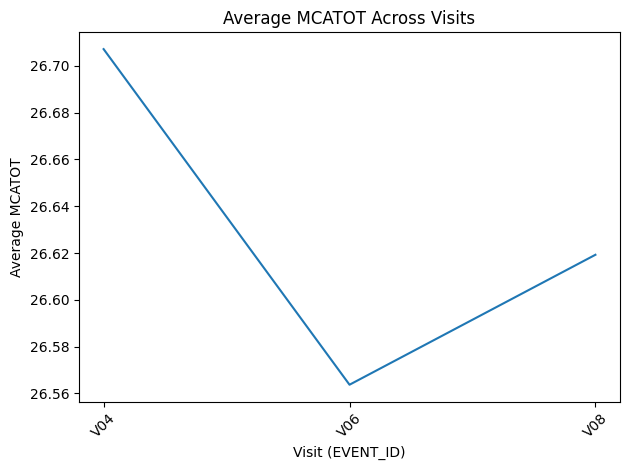

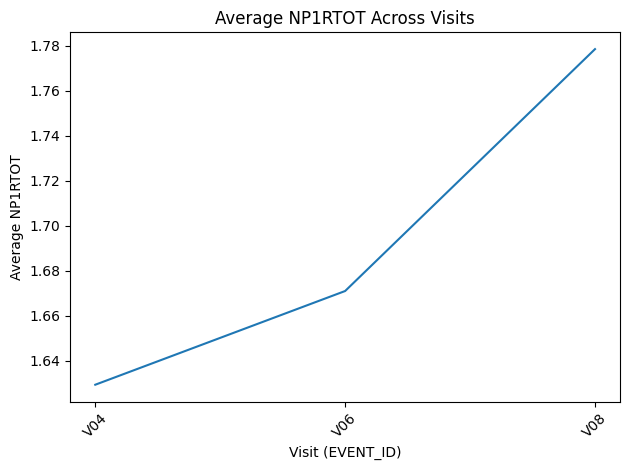

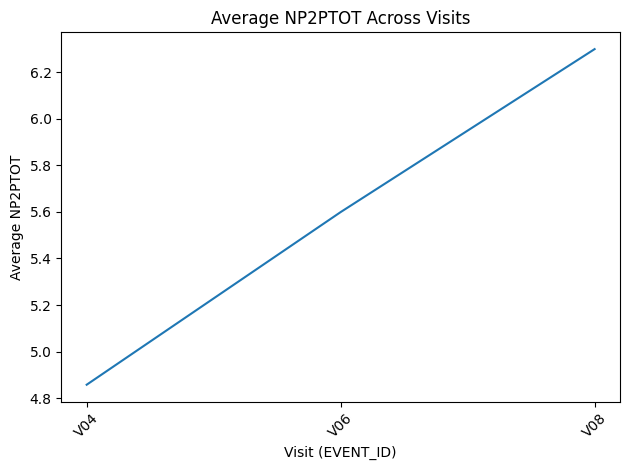

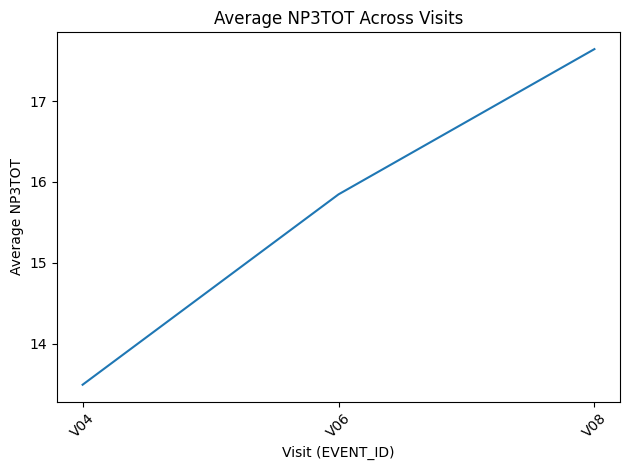

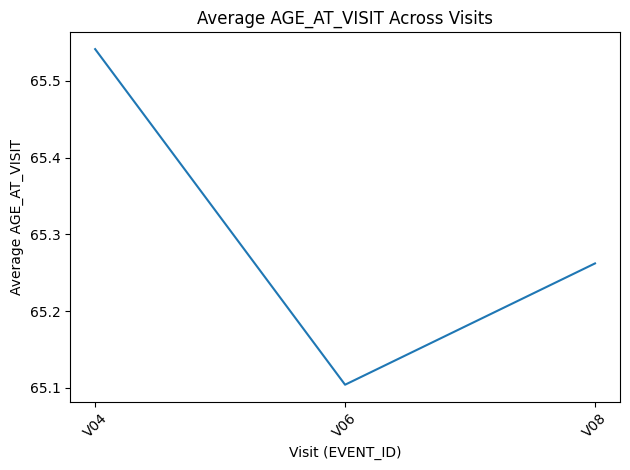

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT"]

for col in cols:
    df_mean = df_prod_pd.groupby('EVENT_ID', as_index=False)[col].mean()
    
    sns.lineplot(data=df_mean, x='EVENT_ID', y=col)
    plt.title(f"Average {col} Across Visits")
    plt.xlabel("Visit (EVENT_ID)")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
Vérification des intervalles
Formule pour valeur de dépression

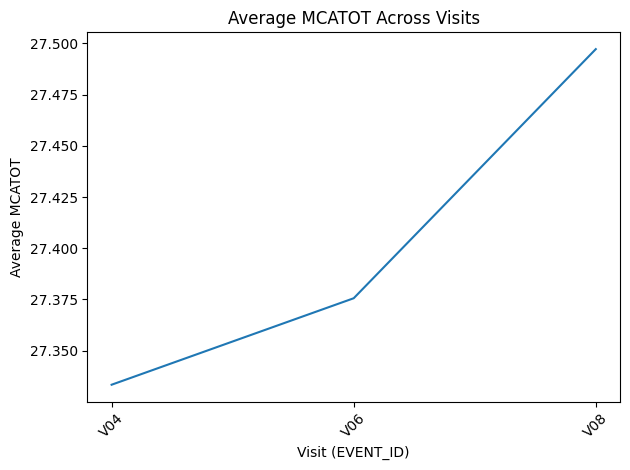

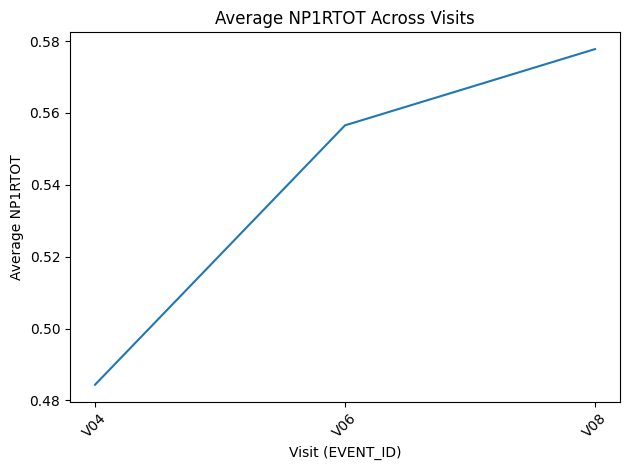

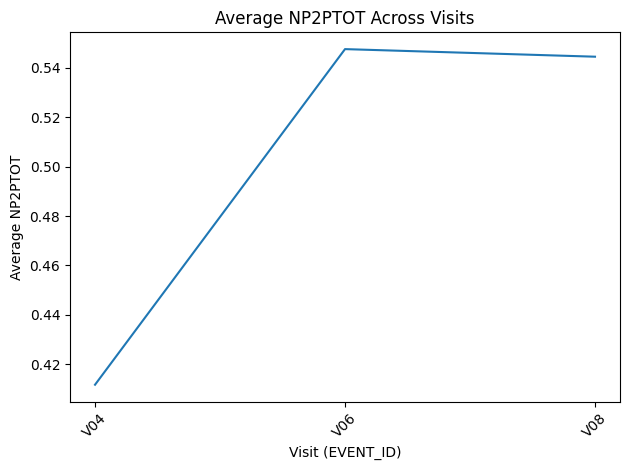

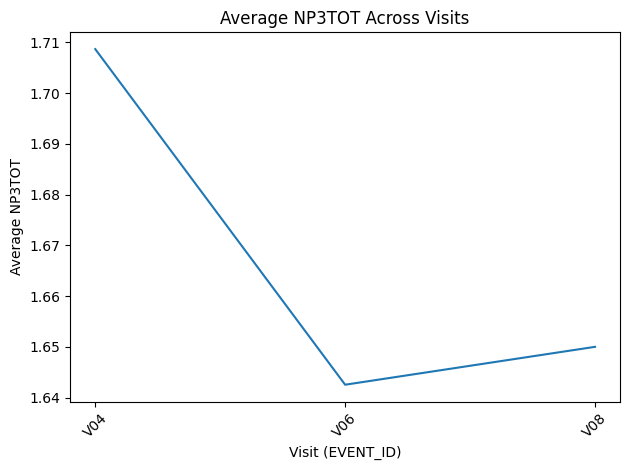

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT"]

for col in cols:
    df_mean = df_control.groupby('EVENT_ID', as_index=False)[col].mean()
    
    sns.lineplot(data=df_mean, x='EVENT_ID', y=col)
    plt.title(f"Average {col} Across Visits")
    plt.xlabel("Visit (EVENT_ID)")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Zmax selection


In [13]:
cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT"]
percentiles_95 = data[cols].quantile(0.95)
print("95th percentiles:")
print(percentiles_95)

95th percentiles:
MCATOT      1.212336
NP1RTOT     5.162356
NP2PTOT    14.930412
NP3TOT     13.414241
Name: 0.95, dtype: float64


In [15]:
percentiles_95

MCATOT      1.212336
NP1RTOT     5.162356
NP2PTOT    14.930412
NP3TOT     13.414241
Name: 0.95, dtype: float64

In [16]:
columns = data.columns.tolist()

In [100]:
data

,MCATOT,NP1RTOT,NP2PTOT,NP3TOT,AGE_AT_VISIT
12,1.172883,3.358867,2.263750,6.250528,0.223782
14,1.172883,-0.517770,1.360453,12.729607,0.320087
16,0.723038,0.451389,4.973640,11.024586,0.407637
20,0.723038,2.389708,13.103312,7.273540,0.442657
22,0.723038,7.235505,12.200015,6.932536,0.530207
...,...,...,...,...,...
12422,0.723038,0.451389,13.103312,11.365590,-0.809306
12425,-1.076341,-0.517770,5.876937,3.863499,-1.352115
12429,NaN,NaN,NaN,NaN,-1.509705
12433,0.273193,4.328027,9.490125,6.591532,0.775346


In [17]:
columns

['MCATOT', 'NP1RTOT', 'NP2PTOT', 'NP3TOT', 'AGE_AT_VISIT']

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_median_zscores(data):
    """
    Plots median and IQR for each biomarker in z-scored data.
    """
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=[f"Biomarker {i+1}" for i in range(data.shape[1])])

    medians = data.median()
    q25 = data.quantile(0.1)
    q75 = data.quantile(0.99)

    plt.figure(figsize=(10, 5))
    plt.plot(medians.index, medians.values, marker='o', label='Median z-score')
    plt.fill_between(medians.index, q25, q75, alpha=0.2, label='IQR (25–75%)')

    plt.axhline(1, color='gray', linestyle='--', label='Z=1')
    plt.axhline(2, color='gray', linestyle='--', label='Z=2')
    plt.axhline(3, color='gray', linestyle='--', label='Z=3')

    plt.xticks(rotation=45)
    plt.ylabel("Z-score")
    plt.title("Median Z-scores with IQR per Biomarker")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

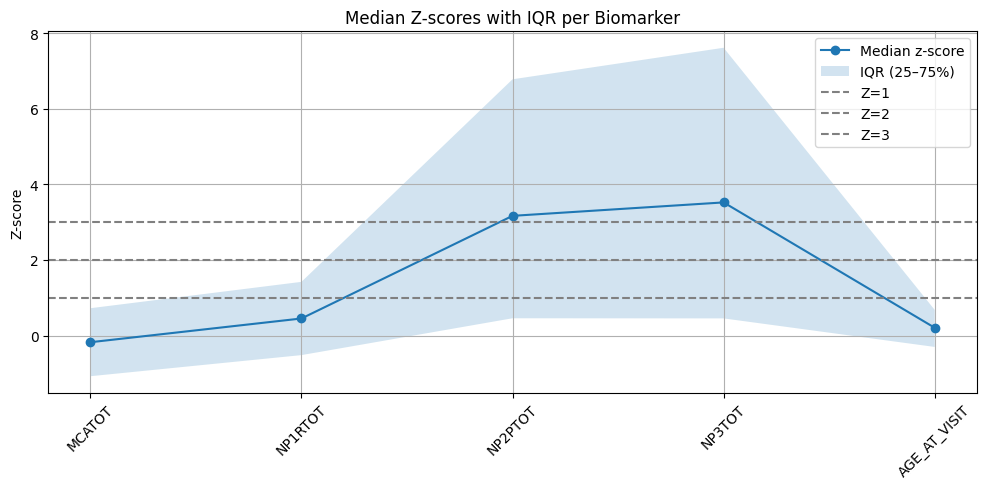

In [99]:
plot_median_zscores(data)

## To be tweaked

In [31]:
Z_vals = np.array([
    [0, 1, 2, 0, 0, 0],
    [1, 2, 4, 5, 6, 0],
    [1, 2, 4, 5, 6, 7]
])
Z_max = np.array([2, 6, 7])

In [19]:
df_pd_prod_selected=df_prod_pd[["NP1RTOT", "NP2PTOT", "NP3TOT"]]

In [13]:
# extract data for control subjects


# compute the mean and standard deviation of the control population
mean_control = np.mean(df_control_selected,axis=0)
std_control = np.std(df_control_selected,axis=0)

# z-score the data
data = (df_pd_prod_selected-mean_control)/std_control
data_control = (df_control_selected-mean_control)/std_control

# multiply data for decreasing biomarkers by -1
#is_decreasing = np.mean(data,axis=0)<np.mean(data_control,axis=0)
#data.loc[:, is_decreasing] = data.loc[:, is_decreasing] * -1

# For data_control
#data_control.loc[:, is_decreasing] = data_control.loc[:, is_decreasing] * -1

# Check that the mean of the control population is 0
#print('Mean of controls is ',np.mean(data_control,axis=0))
# Check that the standard deviation of the control population is 1
#print('Standard deviation of controls is ',np.std(data_control,axis=0))
# Check that the mean of the whole dataset is positive
#print('Mean of whole dataset is ',np.mean(data,axis=0))
# Check that the standard deviation of the whole dataset is greater than 1
#print('Standard deviation of whole dataset is ',np.std(data,axis=0))

In [26]:
data

,AGE_AT_VISIT,MCATOT,NP1RTOT,NP2PTOT,NP3TOT
12,NaN,NaN,3.270118,2.266752,6.262862
14,NaN,NaN,-0.514358,1.362205,12.733158
16,NaN,NaN,0.431761,4.980394,11.030448
20,NaN,NaN,2.323999,13.121318,7.284488
22,NaN,NaN,7.054594,12.216771,6.943946
...,...,...,...,...,...
12422,NaN,NaN,0.431761,13.121318,11.370990
12425,NaN,NaN,-0.514358,5.884941,3.879069
12429,NaN,NaN,NaN,NaN,NaN
12433,NaN,NaN,4.216237,9.503129,6.603404


In [14]:
data=data.drop(columns=["AGE_AT_VISIT", "MCATOT"])

In [15]:
# Remove rows with NaN
data = data.dropna()

# Remove rows with any negative values
data=data[(data >= 0).all(axis=1)]

In [16]:
SuStaInLabels = data.columns.tolist()

In [17]:
data = data.to_numpy() 

In [18]:
SuStaInLabels

['NP1RTOT', 'NP2PTOT', 'NP3TOT']

Run the model after that refer to feature selection

In [34]:
# Input the settings for z-score SuStaIn
# To make the tutorial run faster I've set 
# N_startpoints = 10 and N_iterations_MCMC = int(1e4)
# I recommend using N_startpoints = 25 and 
# N_iterations_MCMC = int(1e5) or int(1e6) in general though
N_startpoints = 25
N_S_max = 2
N_iterations_MCMC = int(1e4)
output_folder = os.path.join(os.getcwd(), 'sim')
dataset_name = 'ppmi'
sustain_input = pySuStaIn.ZscoreSustain(data,
                              Z_vals,
                              Z_max,
                              SuStaInLabels,
                              N_startpoints,
                              N_S_max, 
                              N_iterations_MCMC, 
                              output_folder, 
                              dataset_name, 
                              False)

Deleting previous SuStaIn results if necessary

In [35]:
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
# output_folder = os.path.join(os.getcwd(), 'sim2')    
# dataset_name = 'sim2' 
# sustain_input = ZscoreSustain(data,
#                               Z_vals,
#                               Z_max,
#                               SuStaInLabels,
#                               N_startpoints,
#                               N_S_max, 
#                               N_iterations_MCMC, 
#                               output_folder, 
#                               dataset_name, 
#                               False)

Create folder for results if it dosen't exist already

In [37]:
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

Running the SuStaIn algorithm

In [150]:
import os
print(os.path.exists('C:\\Users\\nss_1\\Desktop\\SustalIn\\pySuStaIn\\notebooks\\sim'))

False


In [151]:
import os
print(os.getcwd())

C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks


In [38]:
# runs the sustain algorithm with the inputs set in sustain_input above
samples_sequence,   \
samples_f,          \
ml_subtype,         \
prob_ml_subtype,    \
ml_stage,           \
prob_ml_stage,      \
prob_subtype_stage  = sustain_input.run_sustain_algorithm()# Load SuStaIn inference results


Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -55106.866916879306


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-53784.13854768]
Overall ML likelihood is [-53784.13854768]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

In [30]:
M=len(data)

In [44]:
print("Z_vals shape:", Z_vals.shape)  # should be (n_biomarkers, n_zscores)
print("Expected events:", Z_vals.shape[0] * Z_vals.shape[1])
print("zvalues length:", len(Z_vals))
print("colour_mat shape:", colour_mat.shape)


Z_vals shape: (3, 7)
Expected events: 21
zvalues length: 3


NameError: name 'colour_mat' is not defined

In [45]:
print("Z_vals shape:", Z_vals.shape)  # Expect (n_biomarkers, n_zscore_levels)
n_events = Z_vals.shape[0] * Z_vals.shape[1]
print("Expected number of z-score events (n_events):", n_events)

Z_vals shape: (3, 7)
Expected number of z-score events (n_events): 21


In [46]:
zvalues = Z_vals.flatten(order='F')

NameError: name 'N_S_gt' is not defined

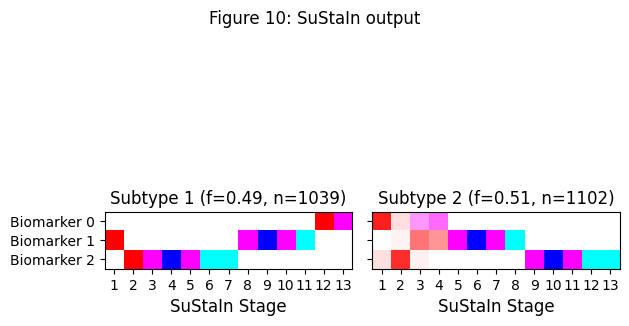

In [39]:


# The code below opens the results for the ground truth number of subtypes
# and plots the output
s = 1
pickle_filename_s           = output_folder + '/pickle_files/' + dataset_name + '_subtype' + str(s) + '.pickle'
pickle_filepath             = Path(pickle_filename_s)
pickle_file                 = open(pickle_filename_s, 'rb')
loaded_variables            = pickle.load(pickle_file)
samples_sequence            = loaded_variables["samples_sequence"]
samples_f                   = loaded_variables["samples_f"]
pickle_file.close()

pySuStaIn.ZscoreSustain._plot_sustain_model(sustain_input,samples_sequence,samples_f,M,subtype_order=(0,1))
_ = plt.suptitle('Figure 10: SuStaIn output')


sustain_input.combine_cross_validated_sequences(N_S_gt, N_folds)
_ = plt.suptitle('Figure 11: Cross-validated SuStaIn output')


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from pySuStaIn import ZscoreSustain

# Step 1: Build correct zvalues
Z_vals = sustain_input.Z_vals  # or loaded from model
zvalues = Z_vals.flatten(order='F')
zvalues = zvalues[zvalues > 0]

# Step 2: Build matching colour_mat
cmap = plt.get_cmap('Reds')
colour_mat = cmap(np.linspace(0.3, 1, len(zvalues)))[:, :3]

# Step 3: Manually call the plotting function with fixed inputs
ZscoreSustain.plot_positional_var(
    samples_sequence,
    samples_f,
    n_samples=M,
    Z_vals=Z_vals,
    zvalues=zvalues,
    biomarker_labels=sustain_input.biomarker_labels,
    subtype_order=(0,1),
    colour_mat=colour_mat
)
plt.suptitle('Figure 10: SuStaIn output')

TypeError: ZscoreSustain.plot_positional_var() got an unexpected keyword argument 'zvalues'

# After Adding more Continious Variables

In [4]:
import pandas as pd

In [19]:
df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')

C:\Users\nss_1\AppData\Local\Temp\ipykernel_22748\3495069841.py:1: DtypeWarning: Columns (4,11,12,58,112,193,202,204) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('C:/Users/nss_1/Desktop/SustalIn/pySuStaIn/notebooks/result_4_long_format.csv',sep=';')


In [20]:
# State Anxiety items (1–20)
state_items = [
    'STAIAD1', 'STAIAD2', 'STAIAD3', 'STAIAD4', 'STAIAD5',
    'STAIAD6', 'STAIAD7', 'STAIAD8', 'STAIAD9', 'STAIAD10',
    'STAIAD11', 'STAIAD12', 'STAIAD13', 'STAIAD14', 'STAIAD15',
    'STAIAD16', 'STAIAD17', 'STAIAD18', 'STAIAD19', 'STAIAD20'
]

# Trait Anxiety items (21–40)
trait_items = [
    'STAIAD21', 'STAIAD22', 'STAIAD23', 'STAIAD24', 'STAIAD25',
    'STAIAD26', 'STAIAD27', 'STAIAD28', 'STAIAD29', 'STAIAD30',
    'STAIAD31', 'STAIAD32', 'STAIAD33', 'STAIAD34', 'STAIAD35',
    'STAIAD36', 'STAIAD37', 'STAIAD38', 'STAIAD39', 'STAIAD40'
]

# Reverse scored items across both subscales
reverse_scored_items = [
    # State
    'STAIAD1', 'STAIAD2', 'STAIAD5', 'STAIAD8', 'STAIAD10',
    'STAIAD11', 'STAIAD15', 'STAIAD16', 'STAIAD19', 'STAIAD20',
    # Trait
    'STAIAD21', 'STAIAD23', 'STAIAD26', 'STAIAD27', 'STAIAD30',
    'STAIAD33', 'STAIAD34', 'STAIAD36', 'STAIAD39', 'STAIAD40'
]


In [21]:
# Reverse score: assuming 4-point Likert scale
for col in reverse_scored_items:
    df[col] = 5 - df[col]

# Sum scores
df['STAI_State_Anxiety'] = df[state_items].sum(axis=1)
df['STAI_Trait_Anxiety'] = df[trait_items].sum(axis=1)

In [22]:
gds_columns = [
    'GDSAFRAD', 'GDSALIVE', 'GDSBETER', 'GDSBORED', 'GDSDROPD',
    'GDSEMPTY', 'GDSENRGY', 'GDSGSPIR', 'GDSHAPPY', 'GDSHLPLS',
    'GDSHOME', 'GDSHOPLS', 'GDSMEMRY', 'GDSSATIS', 'GDSWRTLS'
]

In [23]:
gds_reverse_scored_items = [
    'GDSAFRAD',  # Are you basically satisfied with your life?
    'GDSHAPPY',  # Do you feel happy most of the time?
    'GDSSATIS'   # Do you feel that your life is worthwhile?
]

In [ ]:
gds_regular_items = list(set(gds_columns) - set(gds_reverse_scored_items))

In [24]:
# Reverse-score: Yes(1) becomes 0, No(0) becomes 1
for col in gds_reverse_scored_items:
    df[col] = 1 - df[col]

# Total GDS depression score
df['GDS_Total_Score'] = df[gds_columns].sum(axis=1)


In [25]:
required_visits = ["V04", "V06", "V08"]
cog_cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","STAI_State_Anxiety","STAI_Trait_Anxiety","GDS_Total_Score","MSEADLG"]
selected_columns = ["PATNO", "AGE_AT_VISIT", "FINAL_SEX_ENCODED", "COHORT"] + cog_cols + ["EVENT_ID"]


In [26]:
df = df[df["EVENT_ID"].isin(required_visits)][selected_columns]

In [27]:
df_prod_pd = df[df["COHORT"].isin(["PD", "Prodromal"])]

In [14]:
# import the python packages needed to generate simulated data for the tutorial
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
import sklearn.model_selection
import pandas as pd
import pylab
import sys
import pySuStaIn

# this needs to point to wherever the sim folder inside pySuStaIn is on your computer
#sys.path.insert(0,'/Users/alexandrayoung/Documents/Code/pySuStaIn-test/pySuStaIn/sim/')
# if you're running the notebook from within the existing structure you can use
sys.path.insert(0,'../sim/')
from simfuncs import generate_random_Zscore_sustain_model, generate_data_Zscore_sustain

In [29]:
df_control = df[df["COHORT"].isin(["Healthy Control"])]

In [30]:
# Step 4: Drop any PATNO who has missing values in any of those columns
def is_patient_valid(group):
    return (len(group) == 3) and (not group[cog_cols].isnull().any().any())

df_control = df_control.groupby("PATNO").filter(is_patient_valid)


In [33]:
df_prod_pd = df_prod_pd.groupby("PATNO").filter(is_patient_valid)

In [31]:
# Step 4: Drop any PATNO who has missing values in any of those columns
def is_patient_valid(group):
    return (len(group) == 3) and (not group[cog_cols].isnull().any().any())

df_control = df_control.groupby("PATNO").filter(is_patient_valid)


In [32]:
df_control_selected=  df_control[["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","STAI_State_Anxiety","STAI_Trait_Anxiety","GDS_Total_Score","MSEADLG"]]

In [34]:
df_pd_prod_selected=df_prod_pd[["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","STAI_State_Anxiety","STAI_Trait_Anxiety","GDS_Total_Score","MSEADLG"]]

In [35]:
# extract data for control subjects


# compute the mean and standard deviation of the control population
mean_control = np.mean(df_control_selected,axis=0)
std_control = np.std(df_control_selected,axis=0)

# z-score the data
data = (df_pd_prod_selected-mean_control)/std_control
data_control = (df_control_selected-mean_control)/std_control

# multiply data for decreasing biomarkers by -1
#is_decreasing = np.mean(data,axis=0)<np.mean(data_control,axis=0)
#data.loc[:, is_decreasing] = data.loc[:, is_decreasing] * -1

# For data_control
#data_control.loc[:, is_decreasing] = data_control.loc[:, is_decreasing] * -1

# Check that the mean of the control population is 0
#print('Mean of controls is ',np.mean(data_control,axis=0))
# Check that the standard deviation of the control population is 1
#print('Standard deviation of controls is ',np.std(data_control,axis=0))
# Check that the mean of the whole dataset is positive
#print('Mean of whole dataset is ',np.mean(data,axis=0))
# Check that the standard deviation of the whole dataset is greater than 1
#print('Standard deviation of whole dataset is ',np.std(data,axis=0))

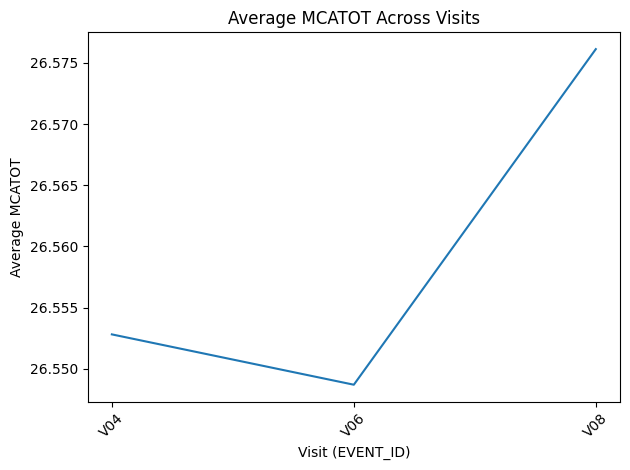

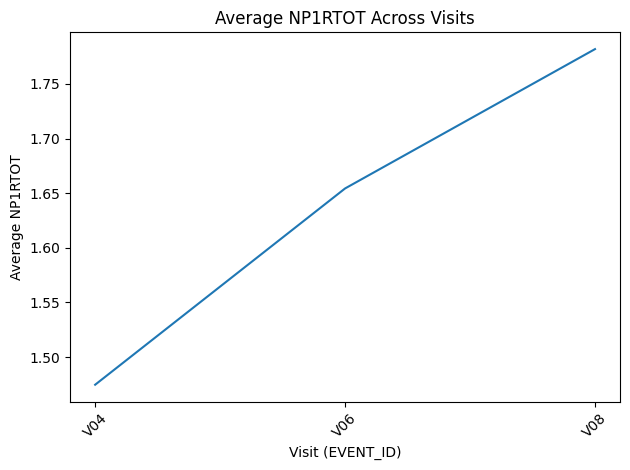

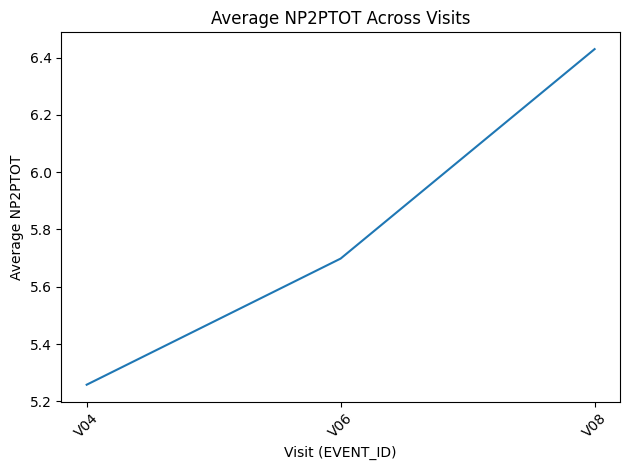

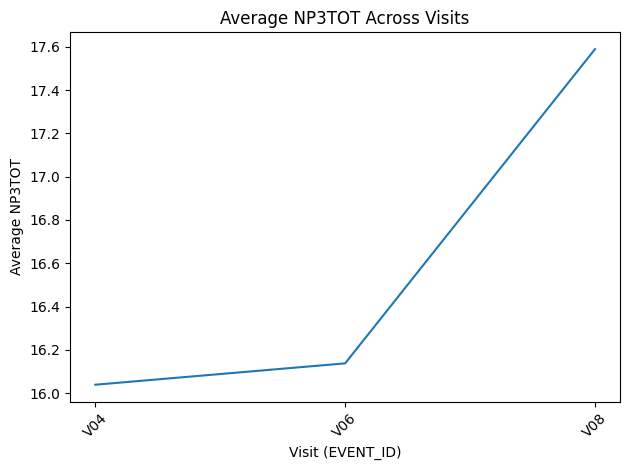

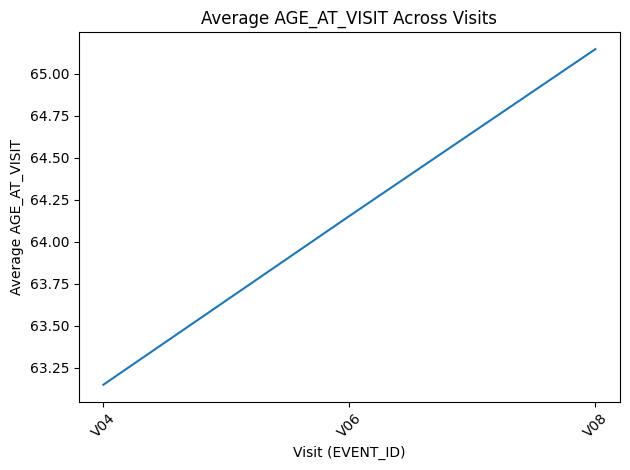

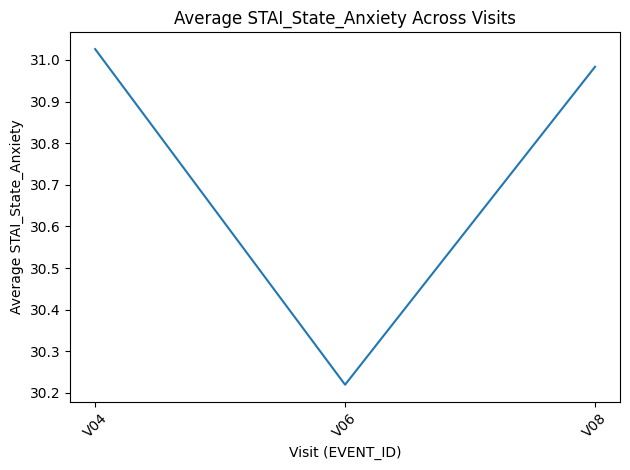

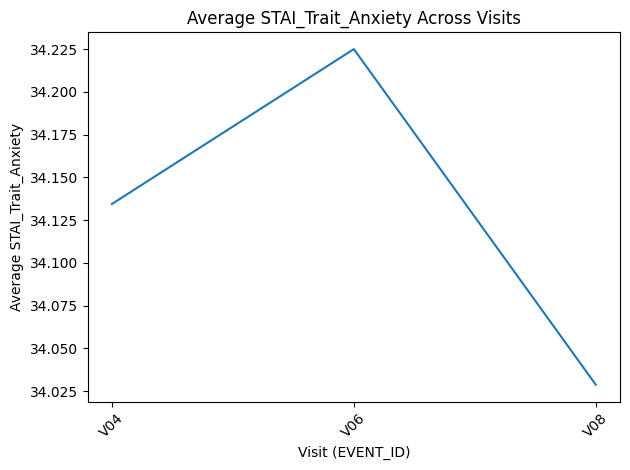

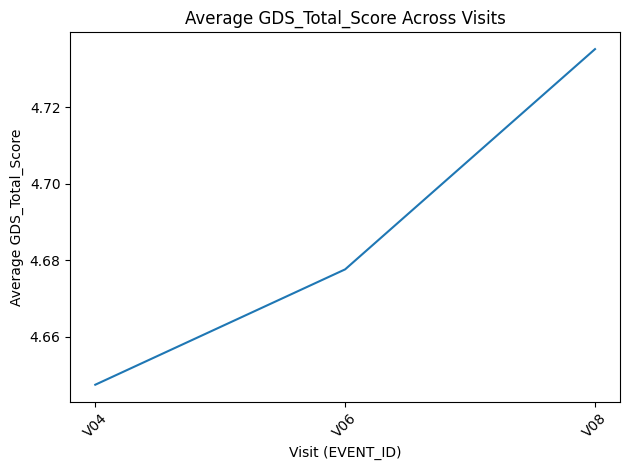

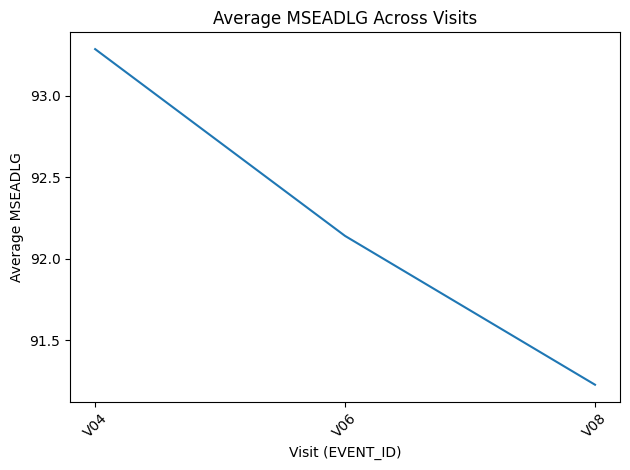

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","STAI_State_Anxiety","STAI_State_Anxiety","GDS_Total_Score","MSEADLG"]

for col in cols:
    df_mean = df_prod_pd.groupby('EVENT_ID', as_index=False)[col].mean()
    
    sns.lineplot(data=df_mean, x='EVENT_ID', y=col)
    plt.title(f"Average {col} Across Visits")
    plt.xlabel("Visit (EVENT_ID)")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

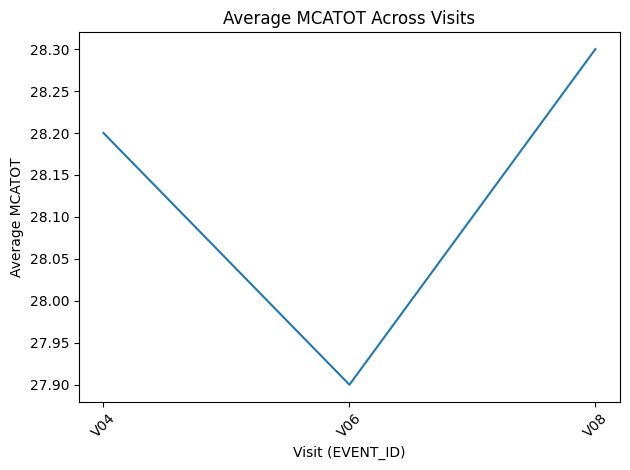

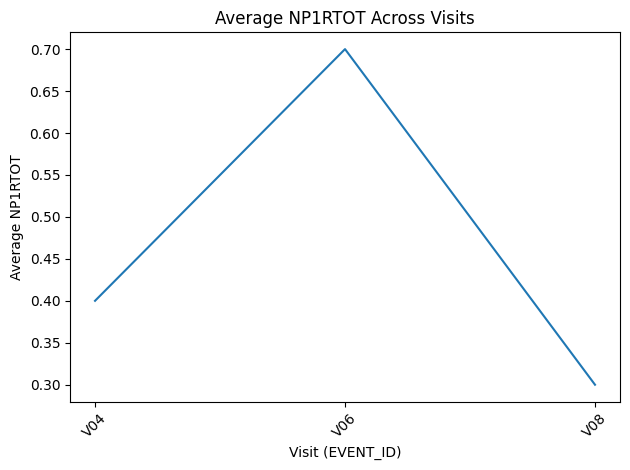

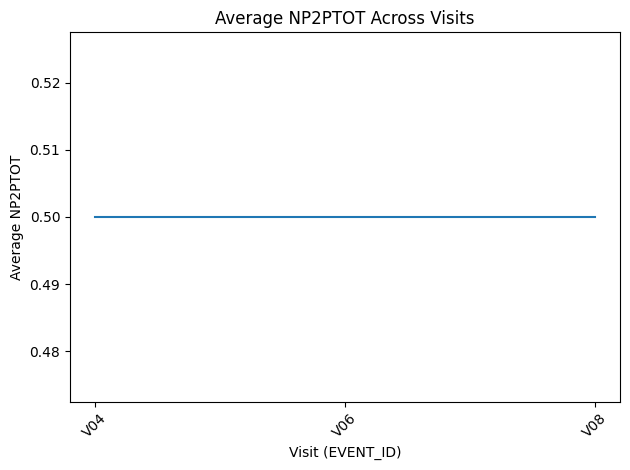

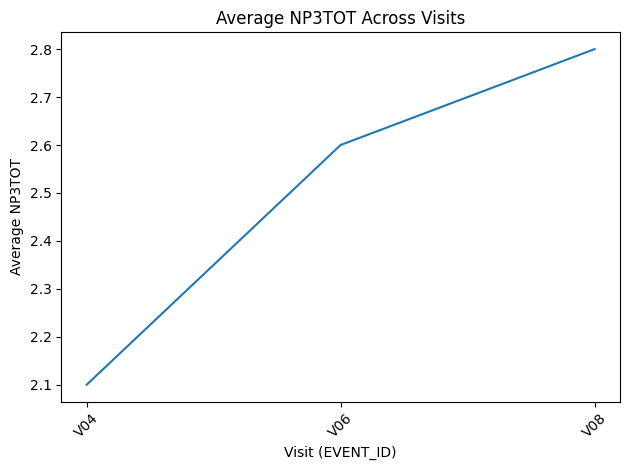

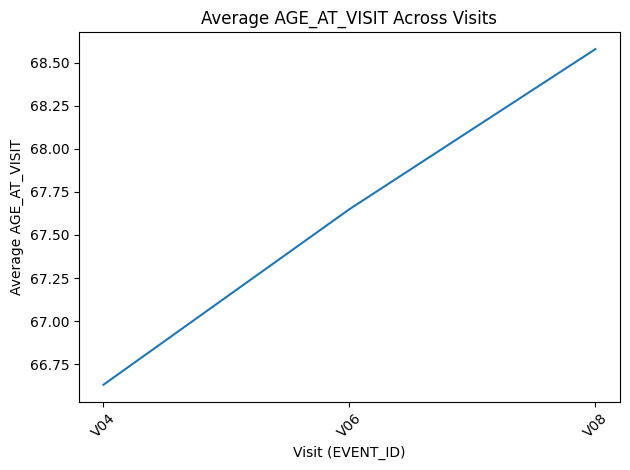

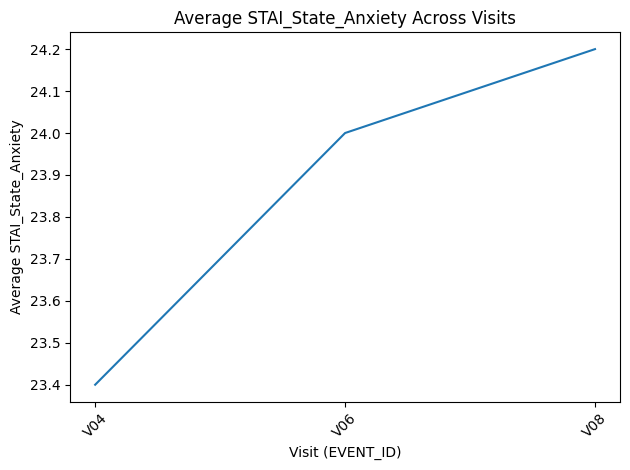

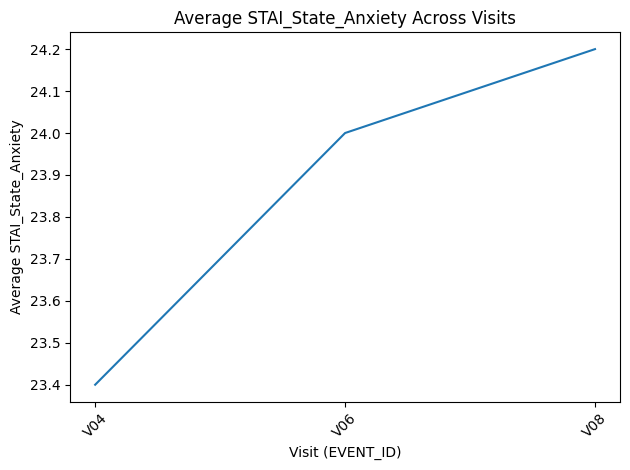

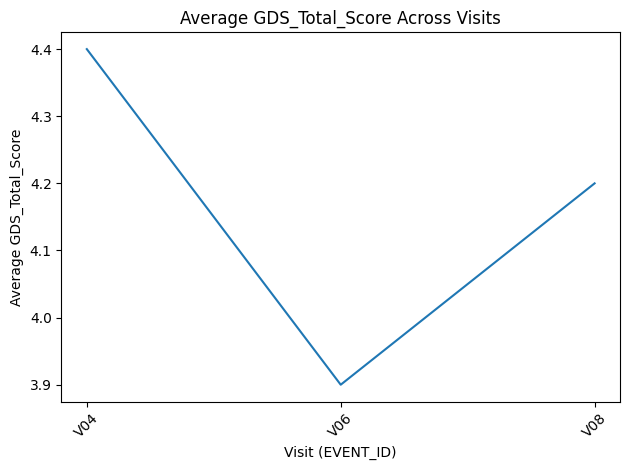

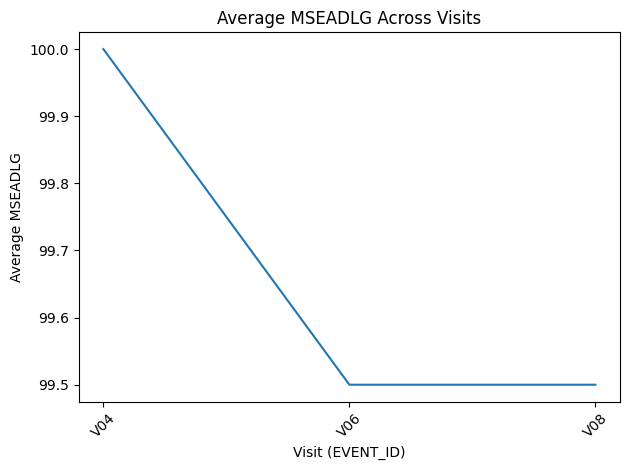

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["MCATOT", "NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","STAI_State_Anxiety","STAI_State_Anxiety","GDS_Total_Score","MSEADLG"]

for col in cols:
    df_mean = df_control.groupby('EVENT_ID', as_index=False)[col].mean()
    
    sns.lineplot(data=df_mean, x='EVENT_ID', y=col)
    plt.title(f"Average {col} Across Visits")
    plt.xlabel("Visit (EVENT_ID)")
    plt.ylabel(f"Average {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# We think we will proceed with the modelling the monotnous variables

### Multiply -1 decreasing variables

In [55]:
# List of columns you want to multiply by -1
columns_to_invert = ["MSEADLG"]  # ← put yours here

# Multiply selected columns by -1
data[columns_to_invert] = data[columns_to_invert] * -1

In [56]:
cols = ["NP1RTOT", "NP2PTOT", "NP3TOT","AGE_AT_VISIT","GDS_Total_Score","MSEADLG"]
percentiles_95 = data[cols].quantile(1)
print("95th percentiles:")
print(percentiles_95)

95th percentiles:
NP1RTOT            22.978417
NP2PTOT            61.909143
NP3TOT             23.272537
AGE_AT_VISIT        2.748812
GDS_Total_Score    12.854388
MSEADLG            63.875437
Name: 1.0, dtype: float64


In [41]:
columns = data.columns.tolist()

In [42]:
columns

['MCATOT',
 'NP1RTOT',
 'NP2PTOT',
 'NP3TOT',
 'AGE_AT_VISIT',
 'STAI_State_Anxiety',
 'STAI_Trait_Anxiety',
 'GDS_Total_Score',
 'MSEADLG']

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_median_zscores(data):
    """
    Plots median and IQR for each biomarker in z-scored data.
    """
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=[f"Biomarker {i+1}" for i in range(data.shape[1])])

    medians = data.median()
    q25 = data.quantile(0.1)
    q75 = data.quantile(0.99)

    plt.figure(figsize=(10, 5))
    plt.plot(medians.index, medians.values, marker='o', label='Median z-score')
    plt.fill_between(medians.index, q25, q75, alpha=0.2, label='IQR (1–99%)')

    plt.axhline(1, color='gray', linestyle='--', label='Z=1')
    plt.axhline(2, color='gray', linestyle='--', label='Z=2')
    plt.axhline(3, color='gray', linestyle='--', label='Z=3')

    plt.xticks(rotation=45)
    plt.ylabel("Z-score")
    plt.title("Median Z-scores with IQR per Biomarker")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

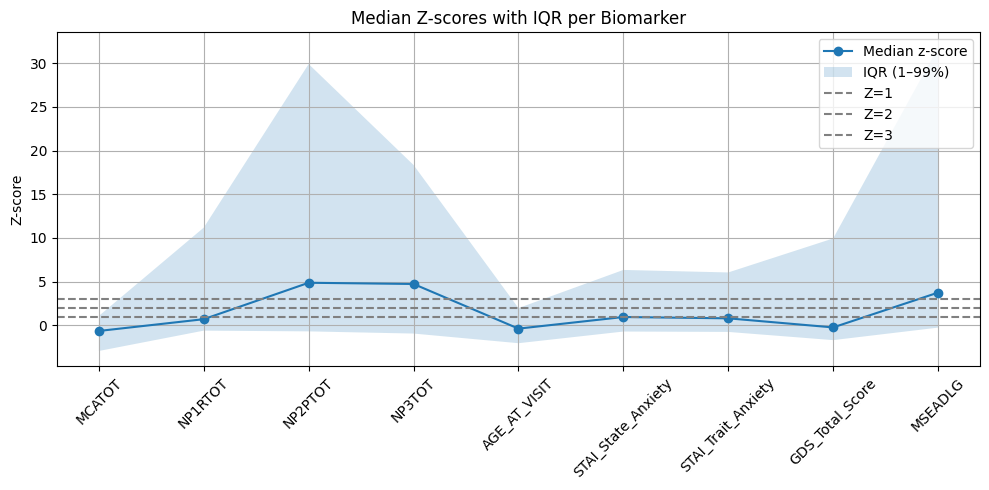

In [59]:
plot_median_zscores(data)

In [64]:
data=data.drop(columns=["STAI_State_Anxiety", "STAI_Trait_Anxiety","MCATOT"])

### Z_vals is an important parameter to work with SustaIn so we need a medical researcher to assess this parameter : Z_vals are the value that calculates the transition from stage 1 to stage 2 for example

In [66]:
import pandas as pd

# Assuming df is your DataFrame
data[data < 0] = 0

In [68]:
# Define desired percentiles
percentiles = [0.1, 0.25, 0.5, 0.75, 0.90,0.95]

# Calculate and print percentiles for each column
for col in data.columns:
    print(f"Column: {col}")
    values = data[col].quantile(percentiles)
    for p, v in zip(percentiles, values):
        print(f"  {int(p*100)}th percentile: {v:.3f}")
    print()

Column: NP1RTOT
  10th percentile: 0.000
  25th percentile: 0.000
  50th percentile: 0.699
  75th percentile: 2.010
  90th percentile: 4.631
  95th percentile: 7.252

Column: NP2PTOT
  10th percentile: 0.000
  25th percentile: 0.696
  50th percentile: 4.869
  75th percentile: 11.825
  90th percentile: 18.781
  95th percentile: 22.955

Column: NP3TOT
  10th percentile: 0.000
  25th percentile: 0.568
  50th percentile: 4.730
  75th percentile: 8.893
  90th percentile: 12.298
  95th percentile: 14.947

Column: AGE_AT_VISIT
  10th percentile: 0.000
  25th percentile: 0.000
  50th percentile: 0.000
  75th percentile: 0.390
  90th percentile: 0.987
  95th percentile: 1.308

Column: GDS_Total_Score
  10th percentile: 0.000
  25th percentile: 0.000
  50th percentile: 0.000
  75th percentile: 1.213
  90th percentile: 4.123
  95th percentile: 7.034

Column: MSEADLG
  10th percentile: 0.000
  25th percentile: 0.000
  50th percentile: 3.742
  75th percentile: 7.751
  90th percentile: 15.768
  95th

In [ ]:
95th percentiles:
NP1RTOT            22.978417
NP2PTOT            61.909143
NP3TOT             23.272537
AGE_AT_VISIT        2.748812
GDS_Total_Score    12.854388
MSEADLG            63.875437
Name: 1.0, dtype: float64

In [95]:
Z_vals = np.array([
    [0, 1, 2, 4, 7, 0],
    [0, 1, 4, 11, 18, 22],
    [0, 1, 4, 8, 12, 14],
    [0, 1, 0, 0, 0, 0],
    [0, 1, 4, 7 ,0, 0],
    [0 ,3 ,7 ,15 ,0, 0]
])
Z_max = np.array([23, 62, 24,3,13,64])

In [89]:
SuStaInLabels = data.columns.tolist()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [78]:
data = data.to_numpy() 

In [96]:
# Input the settings for z-score SuStaIn
# To make the tutorial run faster I've set 
# N_startpoints = 10 and N_iterations_MCMC = int(1e4)
# I recommend using N_startpoints = 25 and 
# N_iterations_MCMC = int(1e5) or int(1e6) in general though
N_startpoints = 25
N_S_max = 2
N_iterations_MCMC = int(1e4)
output_folder = os.path.join(os.getcwd(), 'sim')
dataset_name = 'ppmi'
sustain_input = pySuStaIn.ZscoreSustain(data,
                              Z_vals,
                              Z_max,
                              SuStaInLabels,
                              N_startpoints,
                              N_S_max, 
                              N_iterations_MCMC, 
                              output_folder, 
                              dataset_name, 
                              False)

In [91]:
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)
# output_folder = os.path.join(os.getcwd(), 'sim2')    
# dataset_name = 'sim2' 
# sustain_input = ZscoreSustain(data,
#                               Z_vals,
#                               Z_max,
#                               SuStaInLabels,
#                               N_startpoints,
#                               N_S_max, 
#                               N_iterations_MCMC, 
#                               output_folder, 
#                               dataset_name, 
#                               False)

In [93]:
if not os.path.isdir(output_folder):
    os.mkdir(output_folder)

In [ ]:
data

In [97]:
# runs the sustain algorithm with the inputs set in sustain_input above
samples_sequence,   \
samples_f,          \
ml_subtype,         \
prob_ml_subtype,    \
ml_stage,           \
prob_ml_stage,      \
prob_subtype_stage  = sustain_input.run_sustain_algorithm()# Load SuStaIn inference results


Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype0.pickle. Running SuStaIn model for 0 subtype.
Finding ML solution to 1 cluster problem
Overall ML likelihood is -57610.052799208956


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Failed to find pickle file: C:\Users\nss_1\Desktop\SustalIn\pySuStaIn\notebooks\sim\pickle_files\ppmi_subtype1.pickle. Running SuStaIn model for 1 subtype.
Splitting cluster 1 of 1
 + Resolving 2 cluster problem
 + Finding ML solution from hierarchical initialisation
- ML likelihood is [-47534.00077095]
Overall ML likelihood is [-47534.00077095]


MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MCMC Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

# We also will divide modelling [V04 - V06], [V06 - V08] to keep certain variables because they was affected after medication that was given at V04
#### the variables are : "STAI_State_Anxiety","STAI_Trait_Anxiety","MCATOT"

# After Adding Feat valuable columns because they have higher imputation values and they will affect the dataset negatively


In [ ]:
#Variables to add are : MSEADLG, Gds Score (calculated by sum),Epworth_Sleepiness_Scale_06Jan2025
#We can't add Hoehn and Yahr because its ordinal
#I couldn't find LARS score
# Define domain-specific groups
cognitive_psychiatric = [
    'FEATAPATHY', 'FEATDEPRES', 'FEATDELHAL',
    'FEATCOGFLC', 'FEATCLRLEV', 'FEATPST3YR'
]

motor = [
    'FEATDCRARM', 'FEATMTRFLC', 'FEATMCRGRA', 'FEATSHGAIT', 'FEATSTPPOS', 'FEATWDGAIT',
    'FEATDYSART', 'FEATDYSPHG', 'FEATDYSKIN', 'FEATDYSTNA', 'FEATLMBAPX', 'FEATMYCLNS'
]

autonomic = [
    'FEATBWLDYS', 'FEATURNDYS', 'FEATPOSHYP', 'FEATSEXDYS'
]

sensory_perceptual = [
    'FEATCRTSNS', 'FEATDIMOLF', 'FEATNEURSS'
]

eye_brainstem = [
    'FEATGZEPAL'
]

biological_markers = [
    'FEATSUGRBD', 'FEATNOLEVO', 'FEATPYRTCT', 'FEATSBDERM', 'FEATINSPST'
]

# Compute domain-level scores
df['Score_Cognitive_Psychiatric'] = df[cognitive_psychiatric].sum(axis=1)
df['Score_Motor'] = df[motor].sum(axis=1)
df['Score_Autonomic'] = df[autonomic].sum(axis=1)
df['Score_Sensory_Perceptual'] = df[sensory_perceptual].sum(axis=1)
df['Score_Eye_Brainstem'] = df[eye_brainstem].sum(axis=1)
df['Score_Biological_Markers'] = df[biological_markers].sum(axis=1)

# Optionally, compute a total combined score
all_features = (
    cognitive_psychiatric + motor + autonomic +
    sensory_perceptual + eye_brainstem + biological_markers
)
df['Total_Symptom_Burden'] = df[all_features].sum(axis=1)


# After Selection MOCATOT And AGE_AT_VISIT valid intervals

# After Imputation


We will perform minor imputation which is for under 10% missing variables and a major imputation for missing percentage between [20-60], and we wil proceed with what give us the best accuracy for the model 